In [43]:
import pickle
import numpy as np

In [44]:
mu_bbvi_b = pickle.load(open("mu_bbvi_b", "rb"))
mu_bbvi_cv_b = pickle.load(open("mu_bbvi_cv_b", "rb"))
mu_bbvi_rt_b = pickle.load(open("mu_bbvi_rt_b", "rb"))

In [45]:
sigma2_bbvi_b = pickle.load(open("sigma2_bbvi_b", "rb"))
sigma2_bbvi_cv_b = pickle.load(open("sigma2_bbvi_cv_b", "rb"))
sigma2_bbvi_rt_b = pickle.load(open("sigma2_bbvi_rt_b", "rb"))

In [46]:
data = np.load("mcs_hw2_p3_data.npy")
x = data[:, :2]
y = data[:, 2]
import concurrent.futures
import scipy.stats

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def get_log_p(x, y, beta):
    res = 0.0
    res += np.sum(y * np.log(sigmoid(np.dot(x, beta))) + (1.0 - y) * np.log(1 - sigmoid(np.dot(x, beta))))
    res += np.sum(scipy.stats.norm.logpdf(beta, np.zeros(2), np.ones(2)))
    return res

def get_log_q(mu, sigma2, beta):
    res = np.sum(scipy.stats.norm.logpdf(beta, mu, np.sqrt(sigma2)))
    return res

def elbo(x, y, mu, sigma2):
    res = 0.0
    sample_size = 1024
    sample_beta = np.random.normal(mu, np.sqrt(sigma2), size=[sample_size, mu.shape[0]])
    with concurrent.futures.ThreadPoolExecutor(max_workers=32) as executor:
        future_list = [executor.submit(get_log_p, x, y, beta) for beta in sample_beta]
        for future in concurrent.futures.as_completed(future_list):
            res += future.result()

    with concurrent.futures.ThreadPoolExecutor(max_workers=32) as executor:
        future_list = [executor.submit(get_log_q, mu, sigma2, beta) for beta in sample_beta]
        for future in concurrent.futures.as_completed(future_list):
            res += future.result()
    print(res / sample_size)
    return res / sample_size

In [47]:
mu_bbvi_b = [mu_bbvi_b[10 * i] for i in range(1000)]
mu_bbvi_cv_b = [mu_bbvi_cv_b[10 * i] for i in range(1000)]
mu_bbvi_rt_b = [mu_bbvi_rt_b[10 * i] for i in range(1000)]

sigma2_bbvi_b = [sigma2_bbvi_b[10 * i] for i in range(1000)]
sigma2_bbvi_cv_b = [sigma2_bbvi_cv_b[10 * i] for i in range(1000)]
sigma2_bbvi_rt_b = [sigma2_bbvi_rt_b[10 * i] for i in range(1000)]

In [62]:
elbo_bbvi_b = [elbo(x, y, mu_bbvi_b[i], sigma2_bbvi_b[i]) for i in range(670)]
elbo_bbvi_cv_b = [elbo(x, y, mu_bbvi_cv_b[i], sigma2_bbvi_cv_b[i]) for i in range(1000)]
elbo_bbvi_rt_b = [elbo(x, y, mu_bbvi_rt_b[i], sigma2_bbvi_rt_b[i]) for i in range(1000)]

-10424.735947806173
-7330.631599372302
-5824.2412069652855
-5029.48670840928
-4862.768387827658
-4808.467016388055
-4773.147136840378
-4741.258273969174
-4736.461339425885
-4708.853655096846
-4738.131279694937
-4830.001659491403
-4956.397091956905
-4892.290020267709
-4655.322391005338
-4575.739383508161
-4576.602395675597
-4658.908526305082
-4703.779000750176
-4824.9291039194295
-4972.705410816973
-5021.627329223565
-5255.548319376547
-5236.562042375723
-5048.87930664621
-4954.307946618819
-4859.208313551889
-4829.8176815174065
-4750.409594753706
-4804.089475244634
-4717.740002805655
-4730.25945396171
-4890.2127234468135
-5041.97818527969
-4908.460914756876
-4828.079868918133
-4518.121750043548
-4581.794900378734
-4609.9513239295175
-4649.56896737405
-4574.386506313869
-4645.805225439694
-4560.3202331244565
-4490.476101641272
-4497.928691741678
-4750.711866330342
-5849.354718420299
-7215.938412782088
-6853.859415959785
-6474.552541957804
-5744.196456429205
-5423.645634209056
-5094.2096

-4509.330449651429
-4467.243789243708
-4464.85692792952
-4459.202731450646
-4499.128758386944
-4544.968010420744
-4656.431768803506
-4758.92315335983
-4890.536112030999
-4846.397651711885
-4907.696408722232
-4974.212072259523
-4986.104963768072
-4889.441780240522
-4586.273574267505
-4505.13911504939
-4515.829493043191
-4516.112375963798
-4514.007102289398
-4524.0190013829615
-4508.608465243875
-4481.236214020228
-4497.42451141968
-4520.429904698564
-4558.36070254122
-4572.328771595248
-4635.8030530386995
-4623.1763570208495
-4564.61245194744
-4504.723547113391
-4459.533299758854
-4458.853644028999
-4479.7690870432025
-4485.404077490502
-4488.243247463264
-4504.819944936313
-4509.757235854142
-4588.93540858644
-4683.357156567756
-4678.449845347702
-4578.98316838094
-4556.378587388683
-4570.469598963568
-4571.246235556405
-4544.117168596999
-4591.385806213713
-4667.917390261681
-4743.638431734828
-4656.984157149368
-4658.31779581561
-4685.787533392055
-4695.530280391436
-4730.22970572734

C:\Users\AndrewHuang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\AndrewHuang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\AndrewHuang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1695: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
C:\Users\AndrewHuang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1696: RuntimeWarning: invalid value encountered in greater
  cond1 = self._support_mask(x) & (scale > 0)


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
-12049.617314644629
-7602.398577049406
-5422.867803655184
-4698.635569003849
-4557.370382595327
-4511.275434478651
-4499.241705906375
-4492.393616486083
-4488.65365252621
-4485.92884286589
-4482.347983483643
-4478.94759092362
-4475.8904833818
-4474.647007397356
-4471.82271757263
-4469.6032087910835
-4470.460070147284
-4467.564707712525
-4467.008982283363
-4465.3725737640425
-4464.477523869143
-4462.9408375598905
-4462.819400767799
-4461.976743611912
-4462.114072851375
-4460.686489361722
-4460.218400682416
-4459.710415304486
-4459.28345317359
-4459.156843560475
-4457.867594915603
-4458.392807670541
-44

-4448.244639441853
-4448.243741682111
-4448.113288345843
-4448.245786926506
-4448.138669929392
-4448.146188128326
-4448.207080724246
-4448.208545447812
-4448.264835913406
-4448.1976228328795
-4448.184395334919
-4448.223870292867
-4448.196181139804
-4448.135948379972
-4448.3389413233235
-4448.116802456523
-4448.155917867218
-4448.0856487582805
-4448.202249407546
-4448.180101158661
-4448.109092909344
-4448.048550285722
-4448.15425712744
-4448.290866538588
-4448.291893472791
-4448.203151285029
-4448.097387189036
-4448.199532650094
-4448.173461582653
-4448.344276091546
-4448.216661332161
-4448.264199537101
-4448.224325584021
-4448.184257351058
-4448.303594329955
-4448.258163672216
-4448.237969718491
-4448.232526115305
-4448.250416689233
-4448.345430075753
-4448.552892659187
-4448.349053988281
-4448.087857259108
-4448.13084595599
-4448.261698588787
-4448.191687590801
-4448.189911940279
-4448.255973724883
-4448.110672471692
-4448.194985854552
-4448.266876885093
-4448.196895135359
-4448.14931

-4448.285030198826
-4448.221411944293
-4448.513932672778
-4448.222313116393
-4448.429114937207
-4448.385571975751
-4448.322573839098
-4448.303801553785
-4448.231764031721
-4448.281440789086
-4448.165092315177
-4448.176042661428
-4448.413488752588
-4448.744259486385
-4448.30400214313
-4448.655036113368
-4448.38396969765
-4448.401052648844
-4448.076660165007
-4448.238982389451
-4448.359625495154
-4448.191823226317
-4448.415741941151
-4448.369416857995
-4448.240718999648
-4448.677540299665
-4448.417387055365
-4448.3562880118125
-4448.265763288716
-4448.2753810032455
-4448.171199264986
-4448.19384675703
-4448.236593604361
-4448.210995164534
-4448.175977273576
-4448.347100582817
-4448.231918382976
-4448.237166324759
-4448.254841331463
-4448.429916992162
-4448.1694904830665
-4448.17601835137
-4448.204793084989
-4448.191277830144
-4448.304617634536
-4448.19106646837
-4448.1785044679345
-4448.174785527566
-4448.221190829911
-4448.408021627839
-4448.393186320169
-4448.29361132048
-4448.30971909

-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800

-4097.833886362184
-4097.835163779228
-4097.834691287956
-4097.833901113241
-4097.833818882295
-4097.833839898324
-4097.833801841973
-4097.833803869762
-4097.833800883858
-4097.833800675369
-4097.8338002969085
-4097.833800330652
-4097.833800255408
-4097.833800259149
-4097.833800257532
-4097.8338002544715
-4097.833800254041
-4097.833800254047
-4097.833800254047
-4097.833800254043
-4097.833800254042
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254041
-4097.833800254289
-4097.833800388495
-4097.833987992845
-4098.1509484676435
-4097.924382792197
-4097.852

In [70]:
elbo_bbvi_b[:-100]

[-10424.735947806173,
 -7330.631599372302,
 -5824.2412069652855,
 -5029.48670840928,
 -4862.768387827658,
 -4808.467016388055,
 -4773.147136840378,
 -4741.258273969174,
 -4736.461339425885,
 -4708.853655096846,
 -4738.131279694937,
 -4830.001659491403,
 -4956.397091956905,
 -4892.290020267709,
 -4655.322391005338,
 -4575.739383508161,
 -4576.602395675597,
 -4658.908526305082,
 -4703.779000750176,
 -4824.9291039194295,
 -4972.705410816973,
 -5021.627329223565,
 -5255.548319376547,
 -5236.562042375723,
 -5048.87930664621,
 -4954.307946618819,
 -4859.208313551889,
 -4829.8176815174065,
 -4750.409594753706,
 -4804.089475244634,
 -4717.740002805655,
 -4730.25945396171,
 -4890.2127234468135,
 -5041.97818527969,
 -4908.460914756876,
 -4828.079868918133,
 -4518.121750043548,
 -4581.794900378734,
 -4609.9513239295175,
 -4649.56896737405,
 -4574.386506313869,
 -4645.805225439694,
 -4560.3202331244565,
 -4490.476101641272,
 -4497.928691741678,
 -4750.711866330342,
 -5849.354718420299,
 -7215.9384

In [94]:
elbo_bbvi = pickle.load(open("elbo_bbvi", "rb"))
elbo_bbvi_cv = pickle.load(open("elbo_bbvi_cv", "rb"))
elbo_bbvi_rt = pickle.load(open("elbo_bbvi_rt", "rb"))

In [92]:
mu_bbvi_rt_b = pickle.load(open("mu_bbvi_rt_b", "rb"))
sigma2_bbvi_rt_b = pickle.load(open("sigma2_bbvi_rt_b", "rb"))
mu_bbvi_rt_b = [mu_bbvi_rt_b[10 * i] for i in range(1000)]
sigma2_bbvi_rt_b = [sigma2_bbvi_rt_b[10 * i] for i in range(1000)]
elbo_bbvi_rt_b = [elbo(x, y, mu_bbvi_rt_b[i], sigma2_bbvi_rt_b[i]) for i in range(1000)]

-10328.729845639471
-6669.723252821072
-5034.812002134453
-4493.072263215861
-4486.586566302202
-4469.713212181282
-4461.254394000963
-4452.024404772593
-4448.2826091626475
-4448.349319060794
-4448.362258897428
-4448.186697367884
-4448.312807889473
-4448.121848215999
-4448.04736582115
-4448.22387602056
-4448.289277438511
-4448.194958085621
-4448.200182721781
-4448.080086475207
-4448.1215436110615
-4448.139745129966
-4448.28412983968
-4448.3190536472275
-4448.384367265862
-4448.28012022834
-4448.33806923097
-4448.220949343357
-4448.120878135478
-4448.175394999166
-4448.220992051147
-4448.419784422423
-4448.34711385112
-4448.229867615632
-4448.34360826697
-4448.146510022059
-4448.1557176607
-4448.266877411615
-4448.238216739131
-4448.082155668969
-4448.2840081137765
-4448.180191787408
-4448.031207295626
-4448.21458246643
-4448.301601269206
-4448.177970150407
-4448.1776165492165
-4448.018305460306
-4448.304006581562
-4448.048436608816
-4448.253374927301
-4448.192559105363
-4448.3693884907

-4448.0276462546635
-4448.323319648258
-4448.2212637304265
-4448.103792141603
-4448.500176046403
-4448.157751196782
-4448.5340703737465
-4448.003805846682
-4448.323145073814
-4448.622648458
-4448.583992520922
-4448.219544485088
-4448.482500333941
-4447.906152495585
-4448.494335881395
-4448.424819190405
-4448.191520962938
-4448.521843850302
-4448.257097639831
-4448.757058469506
-4447.942212526307
-4448.106139359696
-4448.385998861328
-4448.398473992796
-4448.126411180895
-4448.422926047994
-4448.228180724108
-4448.246561394589
-4448.316255338609
-4448.21568675939
-4448.193908724458
-4448.359491303687
-4448.371726802948
-4448.385329854384
-4448.169130030326
-4448.325783828769
-4448.472038047442
-4448.152382969909
-4448.058666511168
-4448.3136108121325
-4448.193496823303
-4448.39346238207
-4448.008313680315
-4448.357408228593
-4448.232000919537
-4448.174727068385
-4448.2705055493725
-4448.242894038591
-4448.133054102204
-4448.516203980604
-4448.329311340331
-4448.242017659621
-4448.153977

-4448.124478796178
-4448.132180267031
-4448.208181439593
-4448.381420395316
-4448.243908459813
-4448.034647837299
-4448.204888578939
-4448.312632474804
-4448.367811516351
-4447.961874223656
-4448.301922566228
-4448.2658891086985
-4448.082232703889
-4448.0574289838905
-4448.610171836201
-4448.037908545846
-4448.458034183962
-4448.082816878932
-4447.994956886583
-4448.23190621925
-4448.346346766968
-4448.618937291026
-4448.098210186009
-4448.317180013151
-4448.258468055176
-4448.156330722793
-4448.2446538773265
-4448.585311825751
-4448.201710399968
-4448.298365144221
-4448.586506542919
-4448.289956178713
-4448.106135616193
-4448.520091515595
-4448.321445222593
-4448.328483763146
-4448.159549475398
-4448.235126536318
-4448.172695385681
-4448.016451996082
-4448.664799927354
-4448.070050263571
-4448.335904696759
-4448.468162224256
-4448.244957093737
-4448.332652926313
-4448.186407525758
-4448.015019936537
-4448.434285049245
-4448.1386824644
-4448.475223835774
-4448.645332539052
-4448.110214

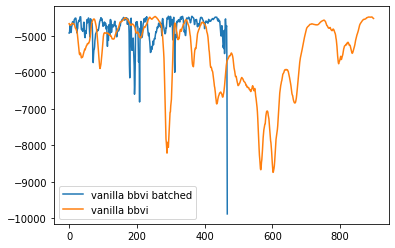

In [90]:
import matplotlib.pyplot as plt
plt.plot(elbo_bbvi_b[100:-102], label="vanilla bbvi batched")

plt.plot(elbo_bbvi[100:], label="vanilla bbvi")
plt.legend()
plt.savefig("bbvi_comp_vanilla")

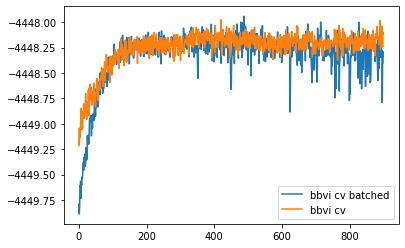

In [78]:
import matplotlib.pyplot as plt

plt.plot(elbo_bbvi_cv_b[100:], label="bbvi cv batched")



plt.plot(elbo_bbvi_cv[100:], label="bbvi cv")

plt.legend()
plt.savefig("bbvi_comp_cv")

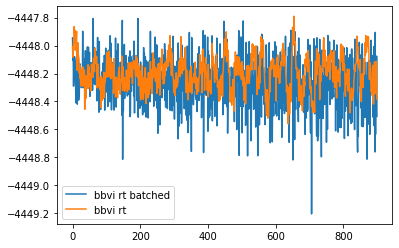

In [97]:
import matplotlib.pyplot as plt

plt.plot(elbo_bbvi_rt_b[100:], label="bbvi rt batched")



plt.plot(elbo_bbvi_rt[100:], label="bbvi rt")

plt.legend()
plt.savefig("bbvi_comp_rt")